<a href="https://colab.research.google.com/github/Codeginner/machineLearning-task/blob/main/4th%20Week%20Tasks/visualisasi_diamonds_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gilman Muslih Z

1103201075

In [26]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets # memungkinkan untuk menggunakan berbagai jenis widget interaktif
from ipywidgets import interact # digunakan untuk membuat widget interaktif yang memungkinkan untuk berinteraksi dengan fungsi atau kode lain.
import numpy as np

In [3]:
# mount google drive ke directory "/content/drive"
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# mendefinisikan path ke berkas CSV yang berisi dataset diamonds
file_path = '/content/drive/MyDrive/Dataset/diamonds.csv'

# membaca dataset dari berkas CSV ke dalam sebuah DataFrame menggunakan pandas
df = pd.read_csv(file_path)

# menampilkan lima baris pertama dari DataFrame untuk melihat contoh data
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [5]:
# menampilkan informasi dataframe (tipe data dan jumlah non-null dalam setiap kolom)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
# list fitur yang ingin dianalisis untuk jumlah nilai uniknya
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# loop melalui setiap fitur dan mencetak jumlah nilai uniknya
for feature in features:
    print(f"Jumlah nilai unik untuk fitur {feature}: {df[feature].nunique()}")


Jumlah nilai unik untuk fitur carat: 273
Jumlah nilai unik untuk fitur cut: 5
Jumlah nilai unik untuk fitur color: 7
Jumlah nilai unik untuk fitur clarity: 8
Jumlah nilai unik untuk fitur depth: 184
Jumlah nilai unik untuk fitur table: 127
Jumlah nilai unik untuk fitur price: 11602
Jumlah nilai unik untuk fitur x: 554
Jumlah nilai unik untuk fitur y: 552
Jumlah nilai unik untuk fitur z: 375


In [8]:
# daftar fitur numerik dalam dataset
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# daftar fitur kategori dalam dataset
categorical_features = ['cut', 'color', 'clarity']

# daftar fitur target (fitur yang ingin diprediksi atau dianalisis)
target = ['price']

# menampilkan daftar fitur numerik, kategori, dan target
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target:", target)


Numerical Features: ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Features: ['cut', 'color', 'clarity']
Target: ['price']


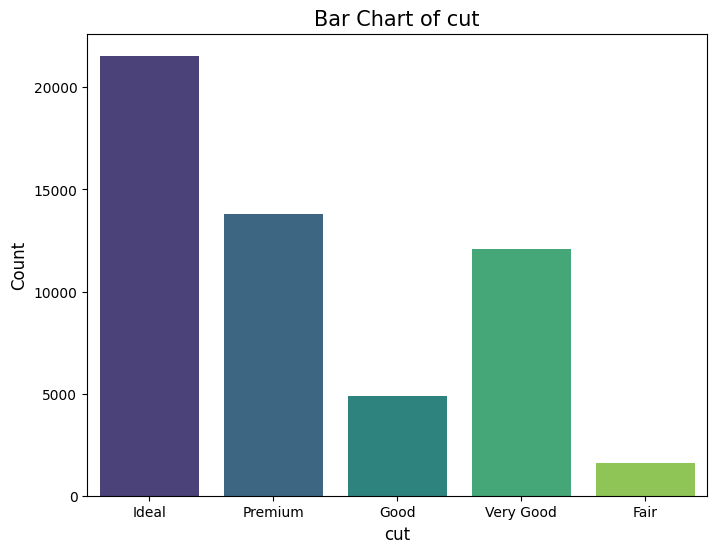

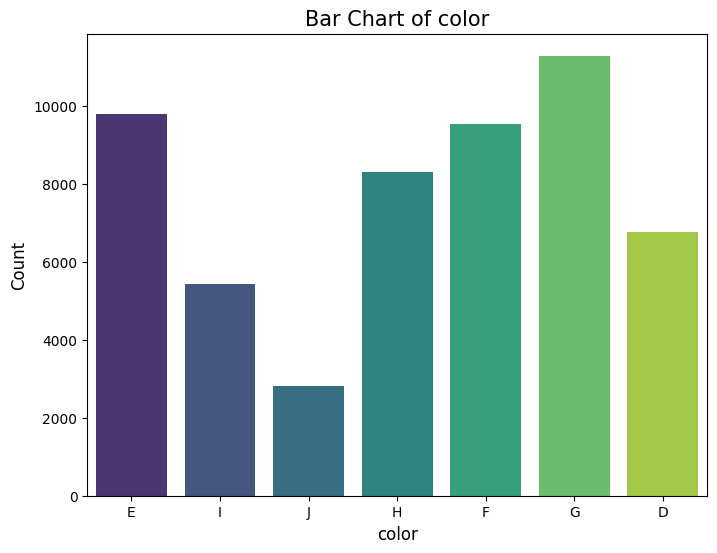

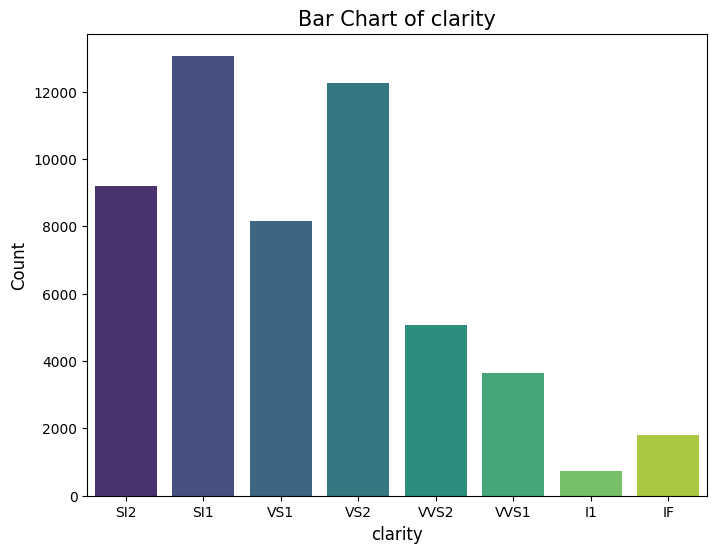

In [9]:
# loop melalui setiap fitur kategorikal
for feature in categorical_features:
    # embuat figur dengan ukuran 8x6 inch
    plt.figure(figsize=(8, 6))

    # membuat grafik countplot menggunakan seaborn
    sns.countplot(x=feature, data=df, palette='viridis')

    # menambahkan judul grafik sesuai dengan fitur
    plt.title(f'Bar Chart of {feature}', size=15)

    # menambahkan label x dan y
    plt.xlabel(feature, size=12)
    plt.ylabel('Count', size=12)

    # menampilkan grafik
    plt.show()

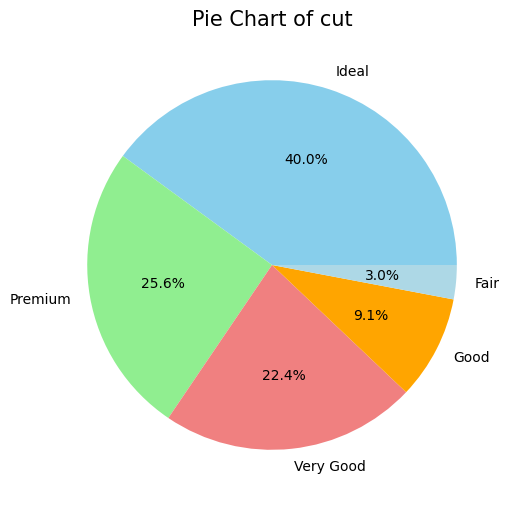

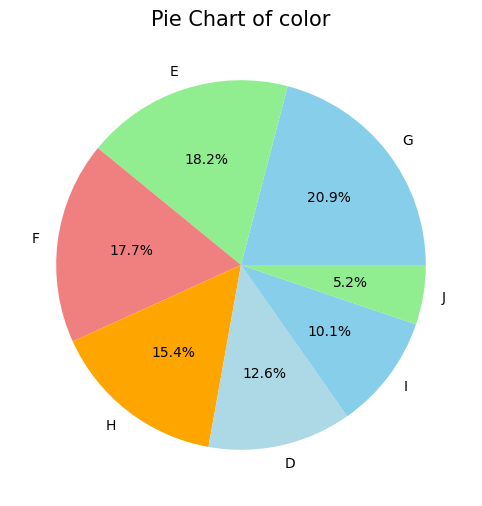

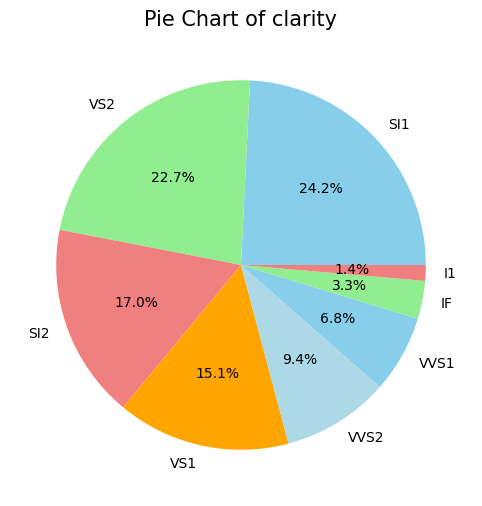

In [11]:
# loop melalui setiap fitur kategorikal
for feature in categorical_features:
    # membuat figur dengan ukuran 8x6
    plt.figure(figsize=(8, 6))

    # membuat grafik pie dari nilai kategori menggunakan plot(kind='pie') dengan warna grafik yang ingin digunakan
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue'])

    # menambahkan judul grafik dengan nama fitur yang telah didefinisikan sebelumnya, yaitu color, cut dan clarity
    plt.title(f'Pie Chart of {feature}', size=15)

    # menghilangkan label sumbu-y
    plt.ylabel('')

    # menampilkan grafik
    plt.show()


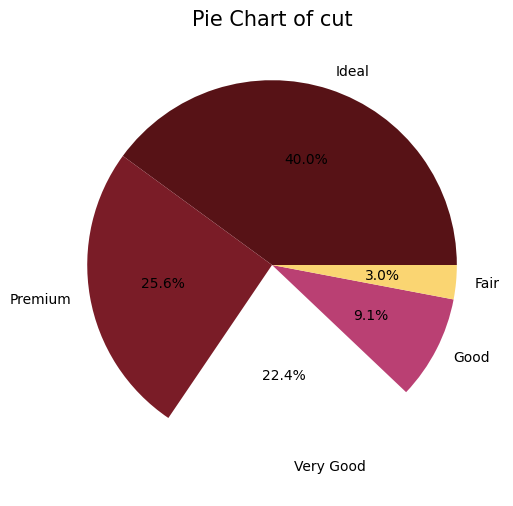

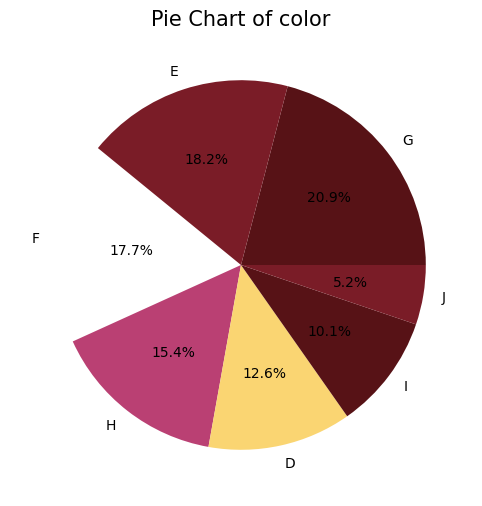

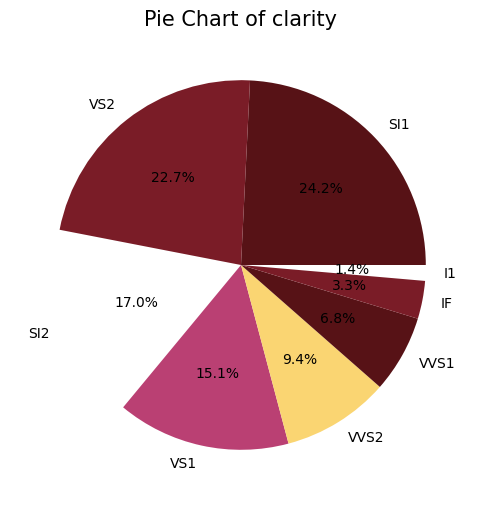

In [19]:
# membuat pie chart dengan warna gelap
dark_colors = ['#571216', '#7A1C27', '#0000', '#BA4073', '#FAD572']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=dark_colors)
    plt.title(f'Pie Chart of {feature}', size=15)
    plt.ylabel('')
    plt.show()

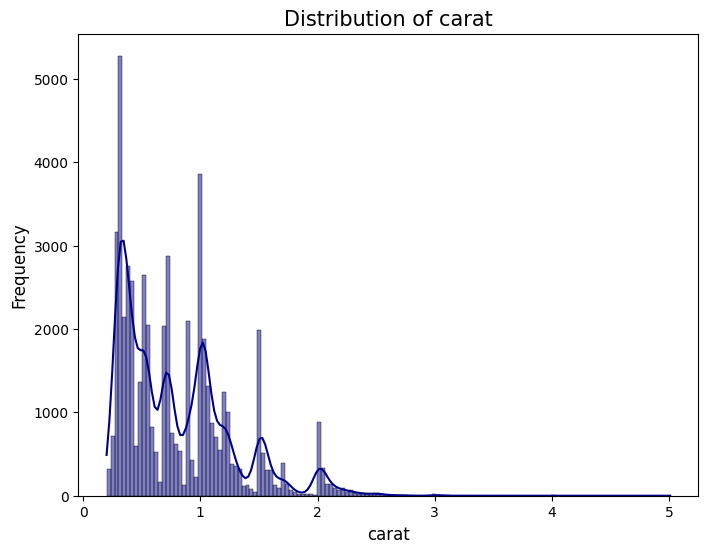

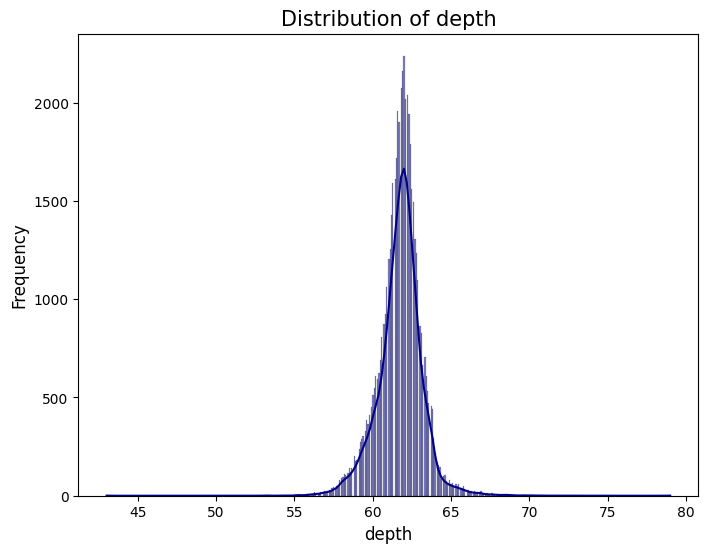

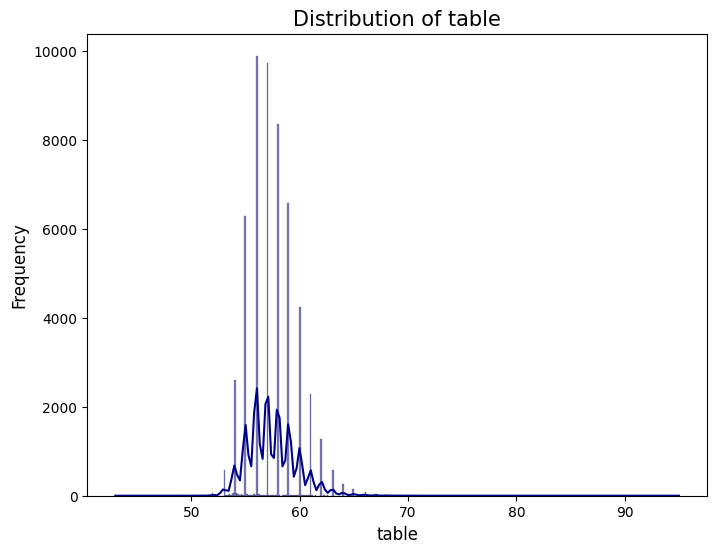

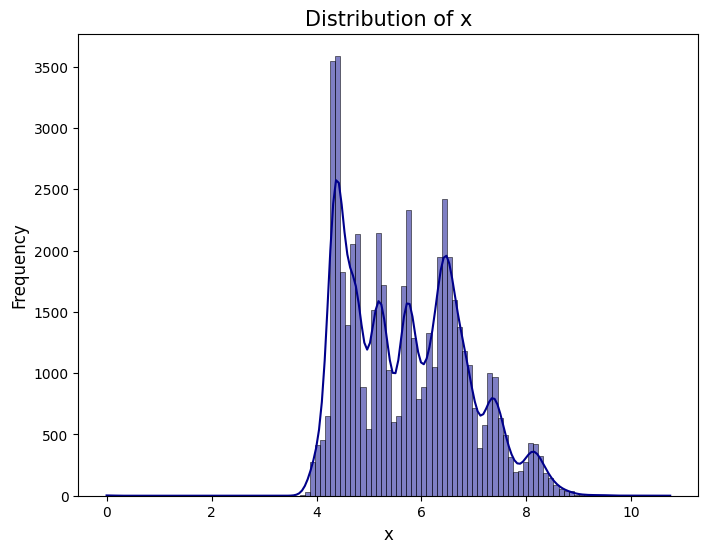

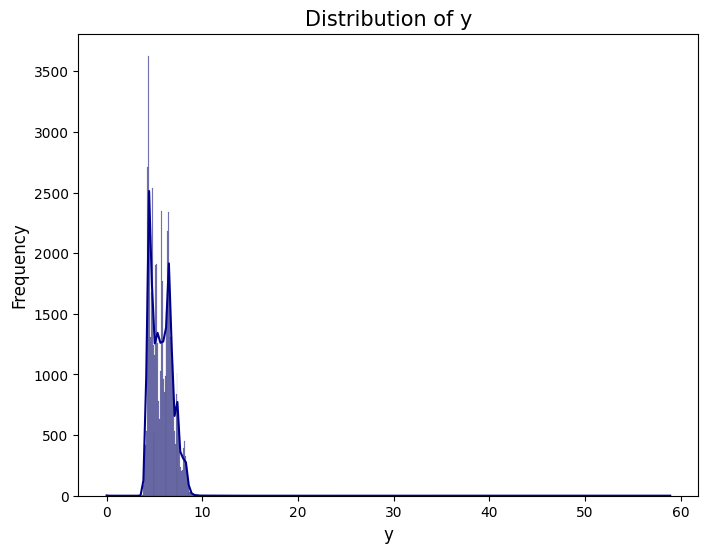

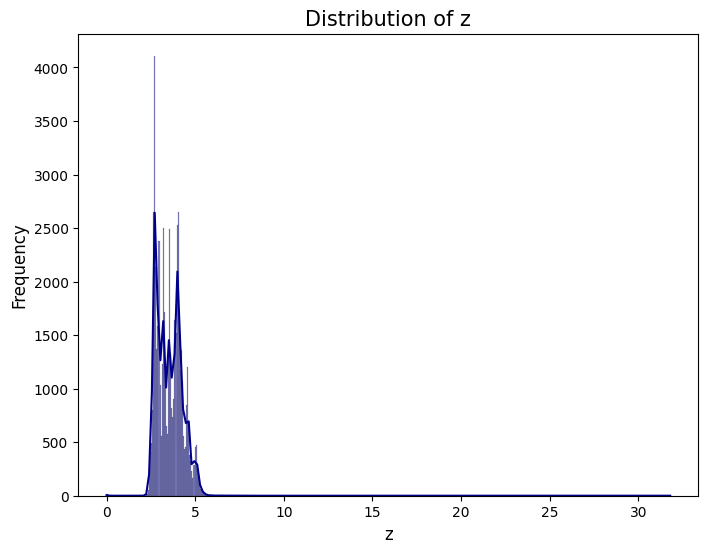

In [23]:
# deklarasi daftar fitur numerik dalam dataset
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# loop melalui setiap fitur numerik
for feature in numerical_features:
    # membuat figur dengan ukuran 8x6
    plt.figure(figsize=(8, 6))

    # membuat histogram dengan garis distribusi (kde) menggunakan seaborn
    sns.histplot(df[feature], kde=True, color='darkblue')

    # membuat judul dengan setiap nama fitur
    plt.title(f'Distribution of {feature}', size=15)

    # menambahkan label sumbu-x dan sumbu-y
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)

    # menampilkan grafik
    plt.show()


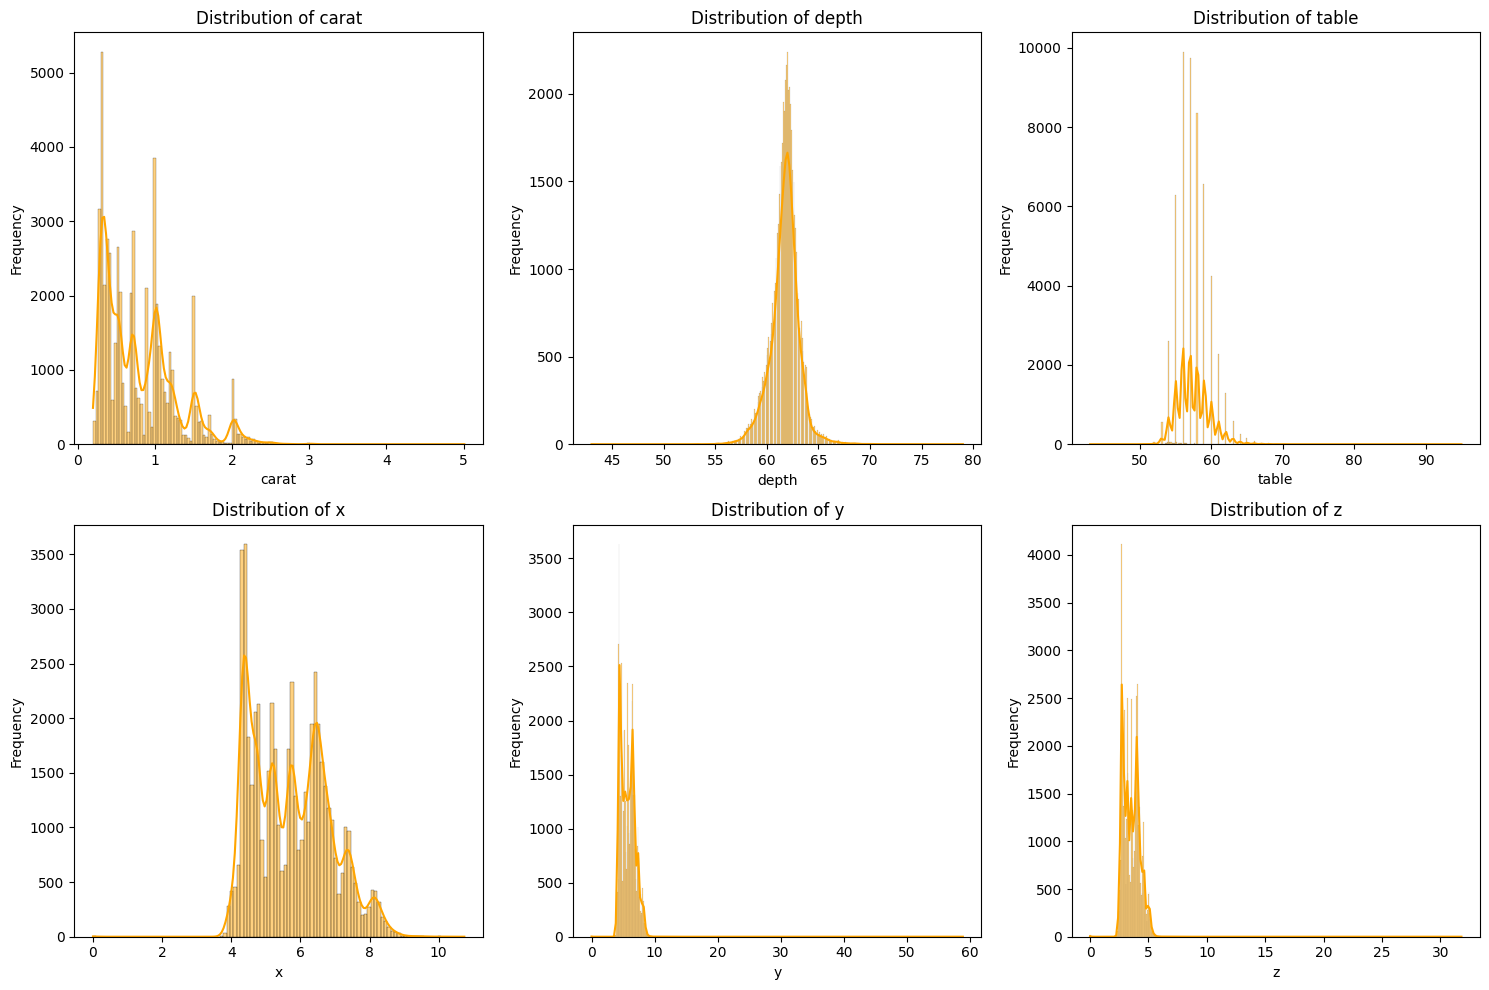

In [24]:
# membuat matriks subplot 2x3 dengan ukuran total 15x10
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# loop melalui setiap fitur numerik dan menggambar histogram di subplot yang sesuai
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='orange', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}', size=12)
    axes[i//3, i%3].set_xlabel(feature, size=10)
    axes[i//3, i%3].set_ylabel('Frequency', size=10)

# menyesuaikan tata letak subplot
plt.tight_layout()

# menampilkan matriks subplot
plt.show()


In [25]:
# fungsi untuk menggambar histogram dengan lebar bin yang dapat disesuaikan
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8, 6))

    # menentukan batas-batas bin berdasarkan min, max, dan lebar bin yang disesuaikan
    bins = np.arange(min(df[feature]), max(df[feature]) + bin_width, bin_width)

    # menggunakan seaborn untuk membuat histogram dengan garis distribusi (kde)
    sns.histplot(df[feature], bins=bins, kde=True, color='red')

    # menambahkan judul grafik
    plt.title(f'Distribution of {feature}', size=15)

    # menambahkan label sumbu-x dan sumbu-y
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)

    # menampilkan grafik
    plt.show()

# loop melalui setiap fitur numerik
for feature in numerical_features:
    # membuat widget interaktif dengan ipywidgets
    interact(plot_histogram, feature=widgets.fixed(feature), bin_width=(0.1, 1, 0.1))


interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

interactive(children=(FloatSlider(value=0.5, description='bin_width', max=1.0, min=0.1), Output()), _dom_class…

In [ ]:
# membuat matriks subplot 2x3 dengan ukuran total (15, 8)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap fitur numerik dan menggambar boxplot di subplot yang sesuai
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i // 3, i % 3], orient='h', color='purple')
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}', size=12)
    axes[i // 3, i % 3].set_xlabel(feature, size=10)

# Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan matriks subplot
plt.show()


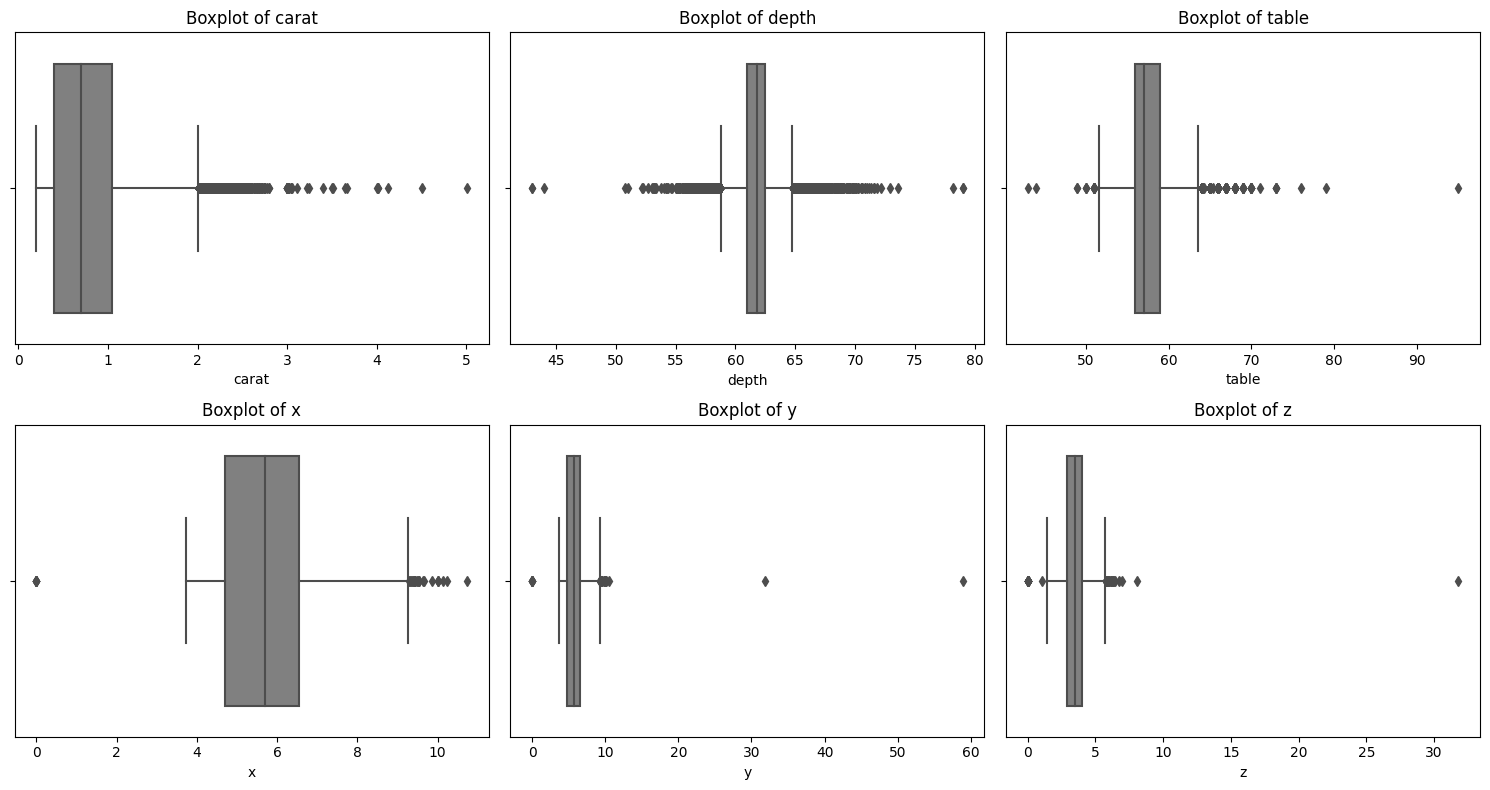

In [27]:
# membuat matriks subplot 2x3 dengan ukuran 15x8
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# loop melalui setiap fitur numerik dan menggambar boxplot di subplot yang sesuai
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i // 3, i % 3], orient='h', color='grey')
    axes[i // 3, i % 3].set_title(f'Boxplot of {feature}', size=12)
    axes[i // 3, i % 3].set_xlabel(feature, size=10)

# menyesuaikan tata letak subplot
plt.tight_layout()

# menampilkan matriks subplot
plt.show()
